In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
main_dir = '/content/gdrive/My Drive/krushimitra_be/merged1.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv(main_dir, parse_dates=['datetime_utc'],index_col='datetime_utc')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


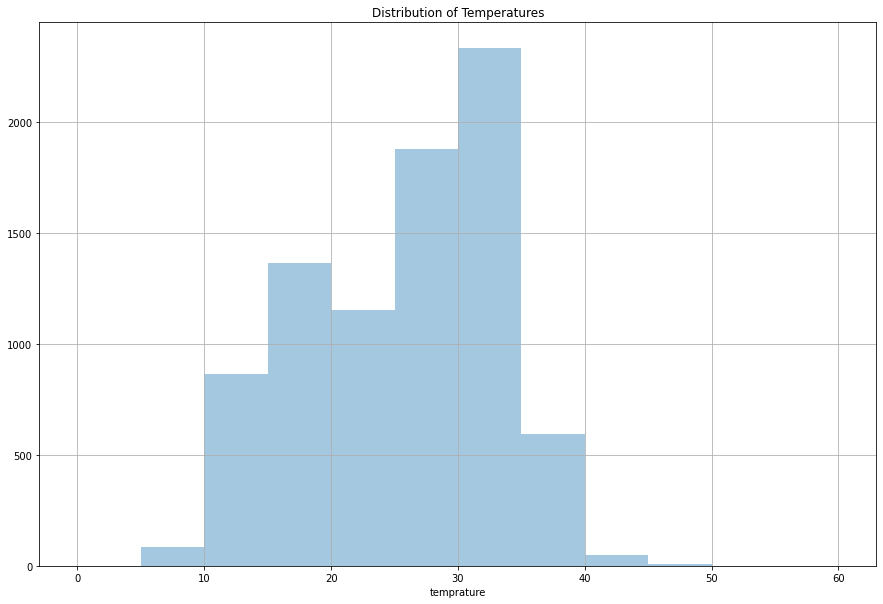

In [ ]:
plt.figure(figsize=(15, 10))
sns.distplot(data['temprature'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [ ]:
data.describe()

,humidity,temprature
count,8318.000000,8318.000000
mean,55.731858,25.585289
std,19.264649,7.570456
min,4.708333,6.000000
25%,42.260417,19.125000
50%,57.288690,27.550505
75%,69.375000,31.500000
max,100.000000,46.750000


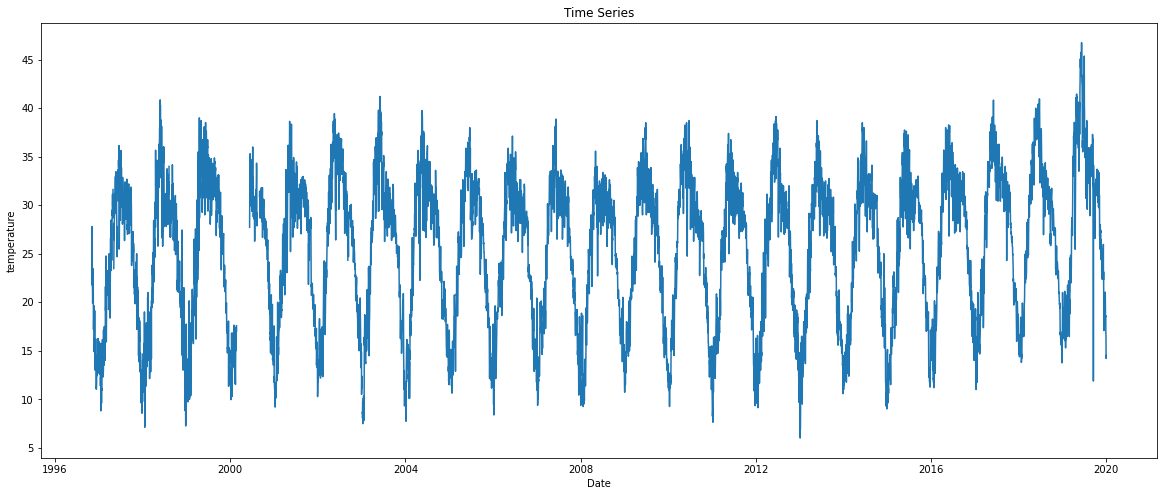

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[['temprature']])
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

In [ ]:
data_t = data.copy()

data_t.drop(columns='humidity', axis=1, inplace=True)

In [ ]:
print(data_t)

              temprature
datetime_utc            
1996-11-01     22.333333
1996-11-02     22.916667
1996-11-03     21.791667
1996-11-04     22.722222
1996-11-05     27.800000
...                  ...
2019-12-28     18.583333
2019-12-29     16.750000
2019-12-30     16.625000
2019-12-31     14.208333
2020-01-01     14.500000

[8462 rows x 1 columns]


In [ ]:
data_t.fillna(data_t['temprature'].mean(), inplace=True)

data_t.temprature.isna().sum()

#data_t.drop(columns='humidity', axis=1, inplace=True)

0

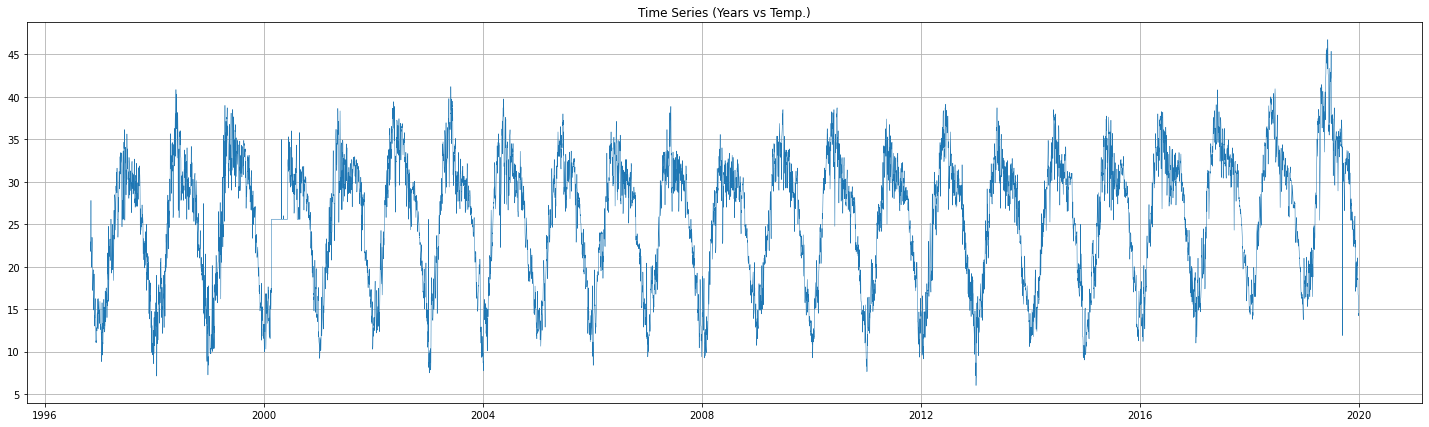

In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(data_t, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data_t)

In [ ]:
data_scaled.shape

(8462, 1)

In [ ]:
steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

In [ ]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [ ]:
x_train = inp[:7731,:,:]
x_test = inp[7731:,:,:]
y_train = out[:7731]
y_test= out[7731:]

In [ ]:
inp.shape , x_train.shape

((8432, 30, 1), (7731, 30, 1))

In [ ]:

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping


"""
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
"""



'\nearly_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)\nmodel = Sequential()\nmodel.add(Conv1D(filters=256, kernel_size=2, activation=\'relu\', input_shape=(30,1)))\nmodel.add(Conv1D(filters=128, kernel_size=2, activation=\'relu\'))\nmodel.add(MaxPooling1D(pool_size=2))\nmodel.add(Flatten())\nmodel.add(RepeatVector(30))\nmodel.add(LSTM(units=100, return_sequences=True, activation=\'relu\'))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units=100, return_sequences=True, activation=\'relu\'))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(units=100, return_sequences=True, activation=\'relu\'))\nmodel.add(LSTM(units=100, return_sequences=True, activation=\'relu\'))\nmodel.add(Bidirectional(LSTM(128, activation=\'relu\')))\nmodel.add(Dense(100, activation=\'relu\'))\nmodel.add(Dense(1))\nmodel.compile(loss=\'mse\', optimizer=\'adam\')\n'

In [ ]:
#plot_model(model, show_shapes=True, to_file='model.png', dpi=50)

In [ ]:
#model.summary()

In [ ]:
#history = model.fit(x_train, y_train,epochs=8, verbose=1 ,callbacks = [early_stop] )

In [ ]:
from keras.models import load_model

model = load_model('/content/gdrive/My Drive/krushimitra_be/weather_data/weatherlstmnewdatat.hdf5')

In [ ]:
predict = model.predict(x_test)
predict = scalar.inverse_transform(predict)
Ytesting = scalar.inverse_transform(y_test)

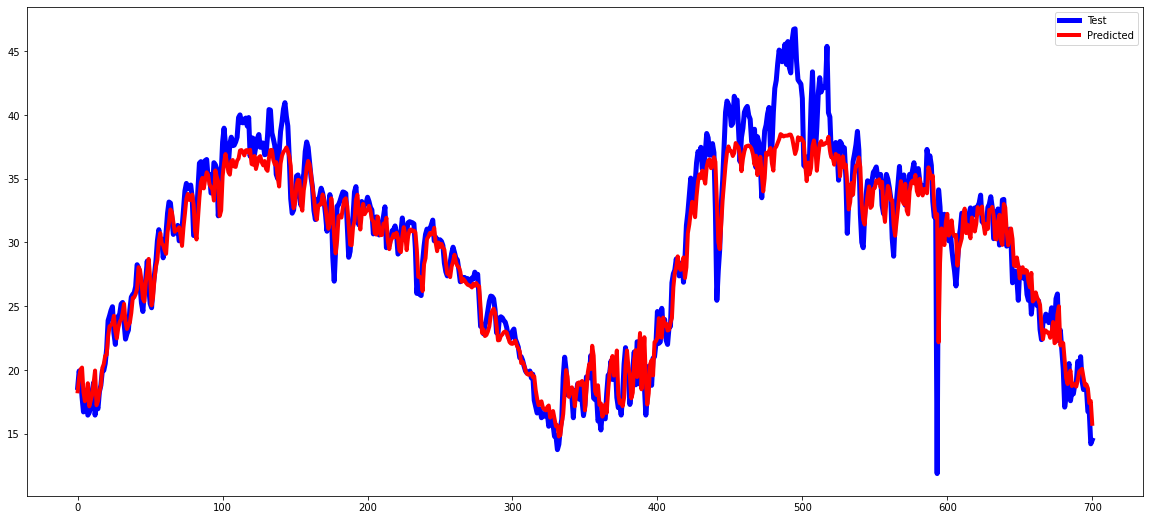

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
data_h = data.copy()

data_h.drop(columns='temprature', axis=1, inplace=True)

In [ ]:
data_h.head()

,humidity
datetime_utc,
1996-11-01,52.916667
1996-11-02,48.625000
1996-11-03,55.958333
1996-11-04,48.055556
1996-11-05,29.400000


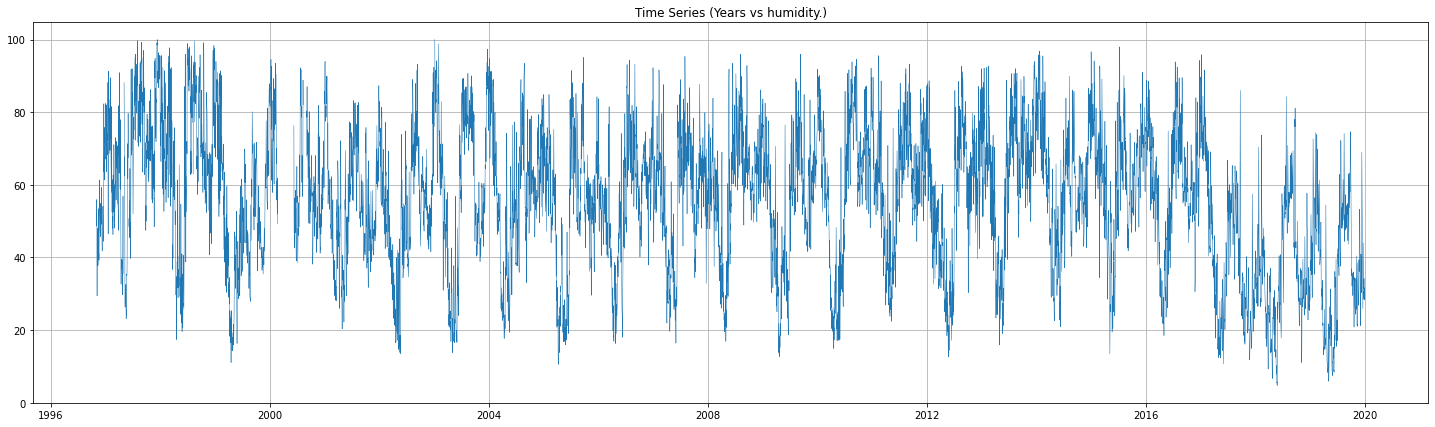

In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(data_h, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs humidity.)")
plt.show()

In [ ]:
data_h.humidity.isna().sum()

144

In [ ]:
data_h.fillna(data_h['humidity'].mean(), inplace=True)

In [ ]:
scalarh = MinMaxScaler(feature_range=(-1,1))
data_scaledh = scalarh.fit_transform(data_h)

In [ ]:
steps = 30
inph = []
outh = []
for i in range(len(data_scaledh)- (steps)):
    inph.append(data_scaledh[i:i+steps])
    outh.append(data_scaledh[i+steps])

In [ ]:
inph=np.asanyarray(inph)
outh=np.asanyarray(outh)

In [ ]:
x_trainh = inph[:7731,:,:]
x_testh = inph[7731:,:,:]
y_trainh = outh[:7731]
y_testh = outh[7731:]

In [ ]:
"""
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
modelh = Sequential()
modelh.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
modelh.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
modelh.add(MaxPooling1D(pool_size=2))
modelh.add(Flatten())
modelh.add(RepeatVector(30))
modelh.add(LSTM(units=100, return_sequences=True, activation='relu'))
modelh.add(Dropout(0.2))
modelh.add(LSTM(units=100, return_sequences=True, activation='relu'))
modelh.add(Dropout(0.2))
modelh.add(LSTM(units=100, return_sequences=True, activation='relu'))
modelh.add(LSTM(units=100, return_sequences=True, activation='relu'))
modelh.add(Bidirectional(LSTM(128, activation='relu')))
modelh.add(Dense(100, activation='relu'))
modelh.add(Dense(1))
modelh.compile(loss='mse', optimizer='adam')
"""

'\nearly_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)\nmodelh = Sequential()\nmodelh.add(Conv1D(filters=256, kernel_size=2, activation=\'relu\', input_shape=(30,1)))\nmodelh.add(Conv1D(filters=128, kernel_size=2, activation=\'relu\'))\nmodelh.add(MaxPooling1D(pool_size=2))\nmodelh.add(Flatten())\nmodelh.add(RepeatVector(30))\nmodelh.add(LSTM(units=100, return_sequences=True, activation=\'relu\'))\nmodelh.add(Dropout(0.2))\nmodelh.add(LSTM(units=100, return_sequences=True, activation=\'relu\'))\nmodelh.add(Dropout(0.2))\nmodelh.add(LSTM(units=100, return_sequences=True, activation=\'relu\'))\nmodelh.add(LSTM(units=100, return_sequences=True, activation=\'relu\'))\nmodelh.add(Bidirectional(LSTM(128, activation=\'relu\')))\nmodelh.add(Dense(100, activation=\'relu\'))\nmodelh.add(Dense(1))\nmodelh.compile(loss=\'mse\', optimizer=\'adam\')\n'

In [ ]:
#modelh.summary()

In [ ]:
#historyh = modelh.fit(x_trainh, y_trainh,epochs=8, verbose=1 ,callbacks = [early_stop] )

In [ ]:
modelh = load_model('/content/gdrive/My Drive/krushimitra_be/weather_data/weatherlstmnewdatah.hdf5')

In [ ]:
predicth = modelh.predict(x_testh)
predicth = scalarh.inverse_transform(predicth)
Ytestingh = scalarh.inverse_transform(y_testh)

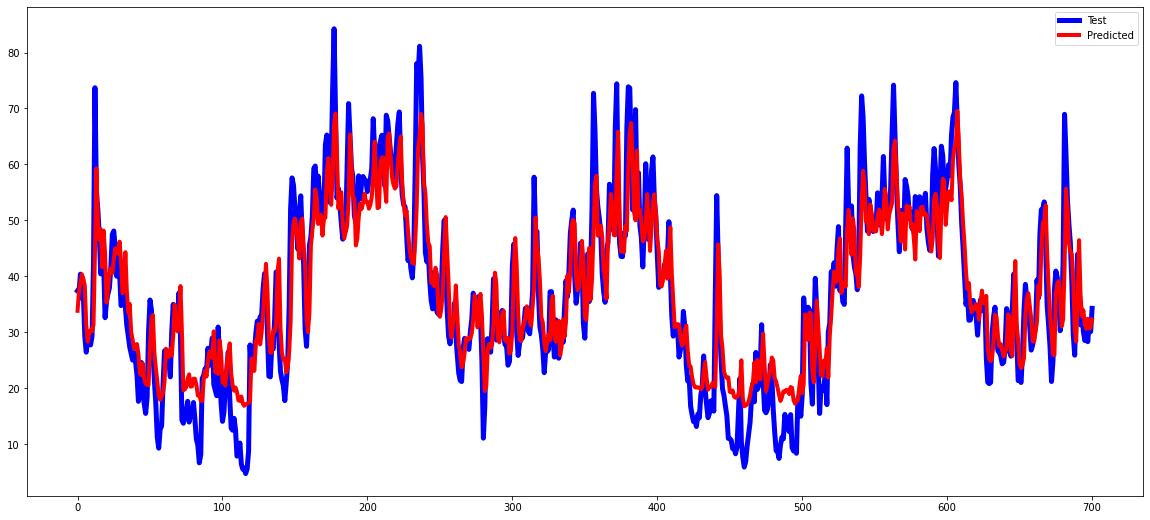

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytestingh , 'blue', linewidth=5)
plt.plot(predicth,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
#modelh.save('/content/gdrive/My Drive/krushimitra_be/weather_data/weatherlstmnewdatah.hdf5')

In [ ]:
data_t_n = data_t[:7731]

data_t_h = data_h[:7731]

In [ ]:
"""
data_t_n.tail()

dtme = pd.date_range(start='1-1-2018', periods=701)
"""

"\ndata_t_n.tail()\n\ndtme = pd.date_range(start='1-1-2018', periods=701)\n"

In [ ]:
dftt = pd.DataFrame( predict, columns=[ "temprature"], index= pd.date_range(start='1-1-2018', periods=701))

dfhh = pd.DataFrame( predicth, columns=[ "humidity"], index= pd.date_range(start='1-1-2018', periods=701))

In [ ]:
dftt.head()

,temprature
2018-01-01,18.324099
2018-01-02,19.420967
2018-01-03,20.048191
2018-01-04,20.185989
2018-01-05,18.249155


In [ ]:
dftt.index.name = 'datetime_utc'

dfhh.index.name = 'datetime_utc'

In [ ]:
ytesting_dftt = pd.DataFrame( Ytesting, columns=[ "temprature"], index= pd.date_range(start='1-1-2018', periods=701))

ytesting_dfhh = pd.DataFrame( Ytestingh, columns=[ "humidity"], index= pd.date_range(start='1-1-2018', periods=701))

In [ ]:
ytesting_dftt.index.name = 'datetime_utc'

ytesting_dfhh.index.name = 'datetime_utc'

ytesting_dftt.head()

,temprature
datetime_utc,
2018-01-01,18.625000
2018-01-02,19.916667
2018-01-03,19.375000
2018-01-04,17.875000
2018-01-05,16.708333


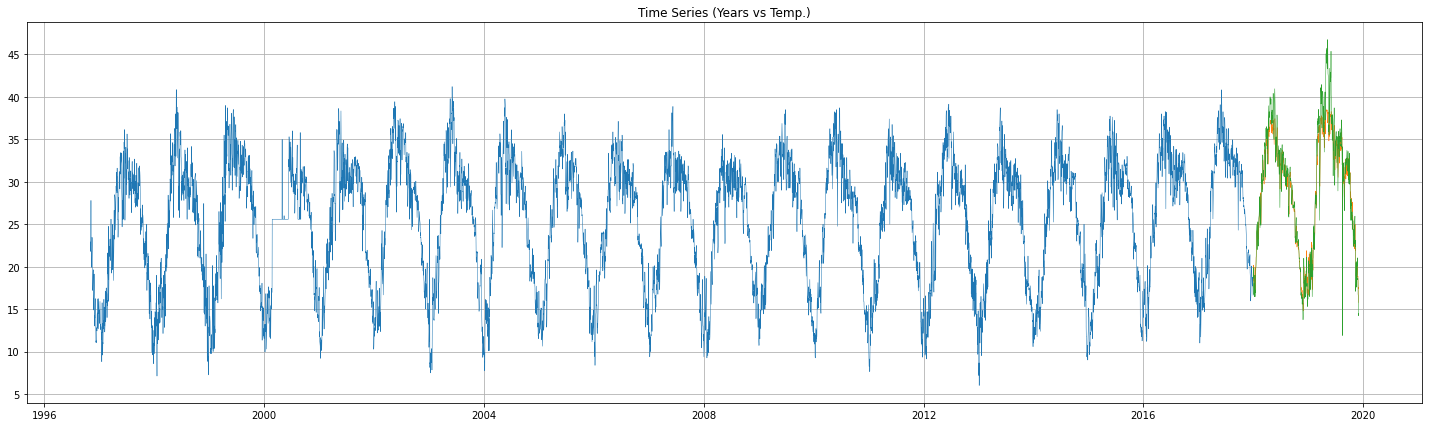

In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(data_t_n, linewidth=.5)
plt.plot(dftt, linewidth=.5)
plt.plot(ytesting_dftt, linewidth=.5)
#plt.plot(data_t, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

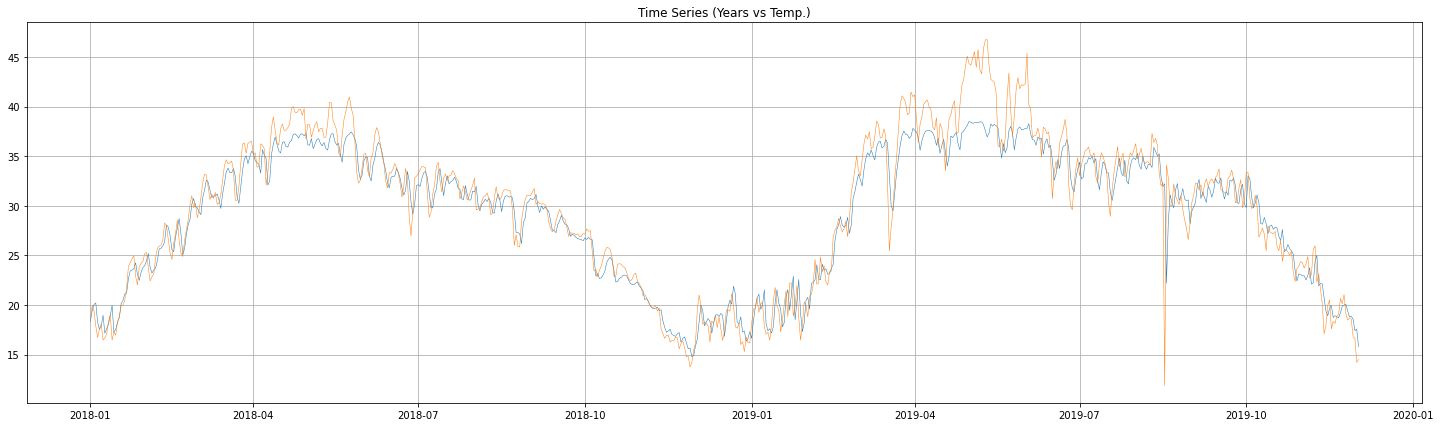

In [ ]:
plt.figure(figsize=(25, 7))
#plt.plot(data_t_n, linewidth=.5)
plt.plot(dftt, linewidth=.5)
plt.plot(ytesting_dftt, linewidth=.5)
#plt.plot(data_t, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

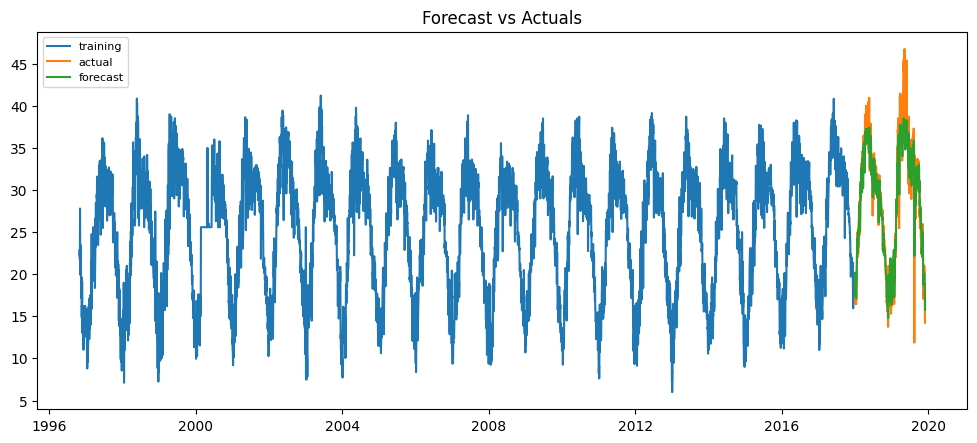

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_t_n, label='training')
plt.plot(ytesting_dftt, label='actual')
plt.plot(dftt, label='forecast')
#plt.fill_between(lower_seriesh.index, lower_seriesh, upper_seriesh, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

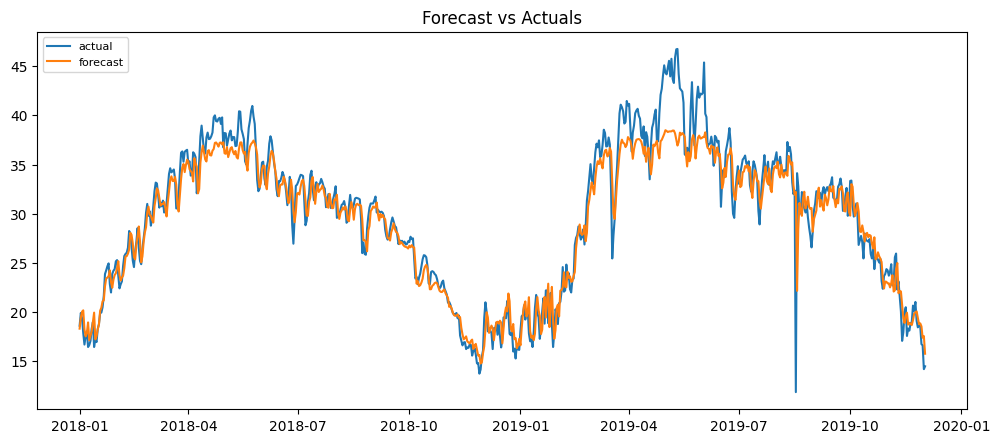

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(data_t_n, label='training')
plt.plot(ytesting_dftt, label='actual')
plt.plot(dftt, label='forecast')
#plt.fill_between(lower_seriesh.index, lower_seriesh, upper_seriesh, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

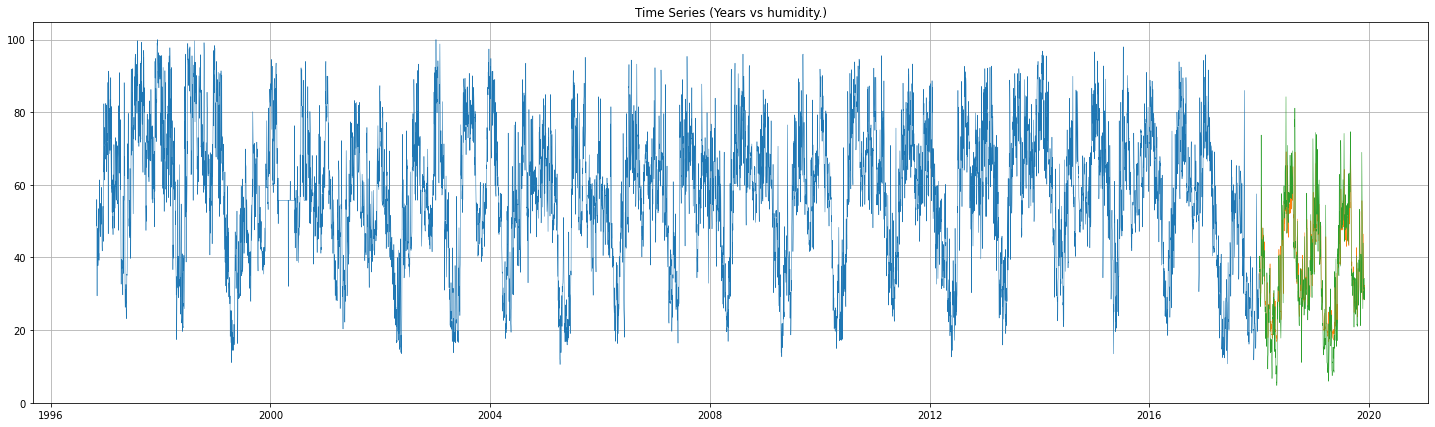

In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(data_t_h, linewidth=.5)
plt.plot(dfhh, linewidth=.5)
plt.plot(ytesting_dfhh, linewidth=.5)
#plt.plot(data_t, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs humidity.)")
plt.show()

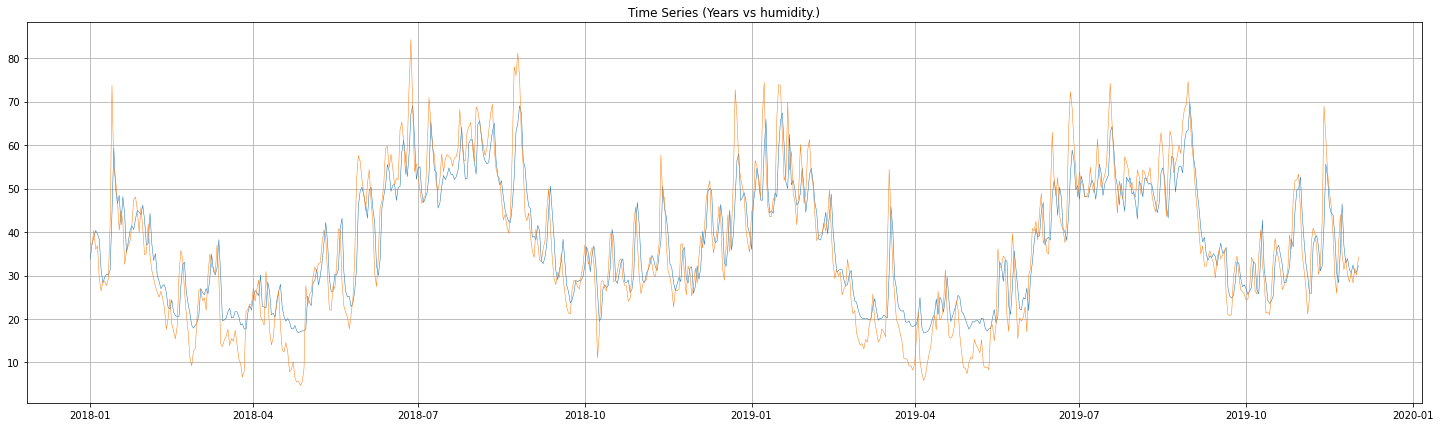

In [ ]:
plt.figure(figsize=(25, 7))
#plt.plot(data_t_n, linewidth=.5)
plt.plot(dfhh, linewidth=.5)
plt.plot(ytesting_dfhh, linewidth=.5)
#plt.plot(data_t, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs humidity.)")
plt.show()

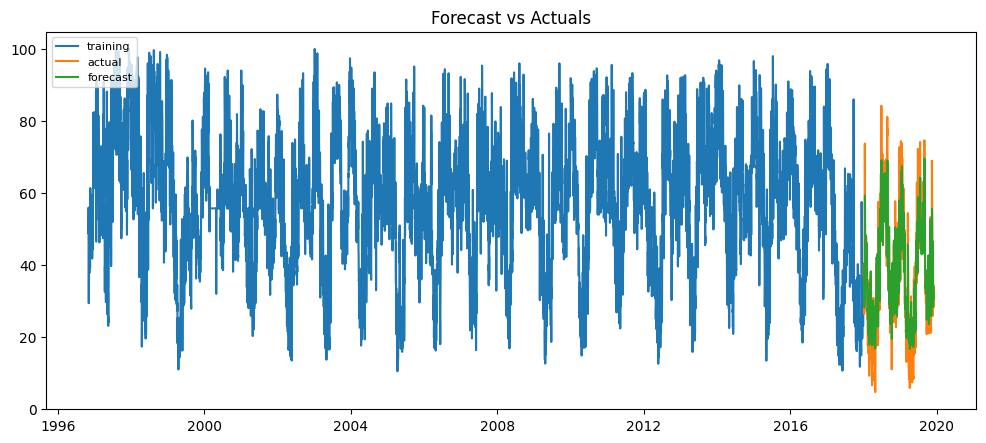

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_t_h, label='training')
plt.plot(ytesting_dfhh, label='actual')
plt.plot(dfhh, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

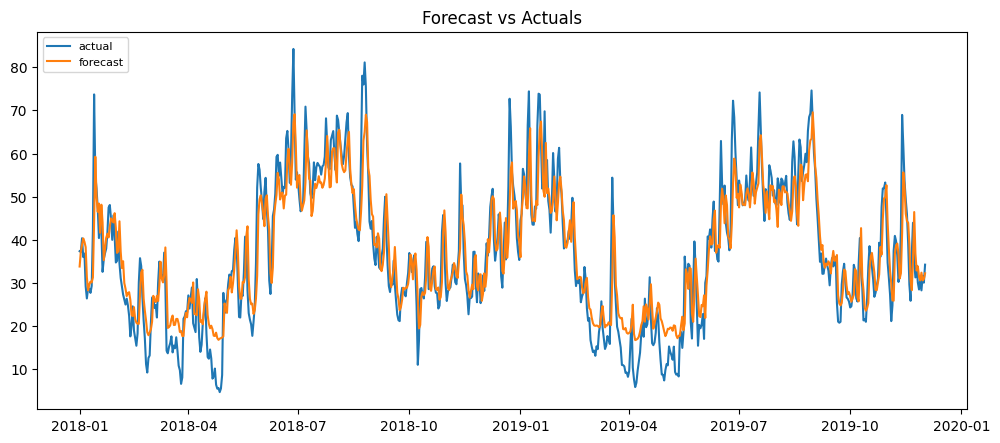

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(data_t_h, label='training')
plt.plot(ytesting_dfhh, label='actual')
plt.plot(dfhh, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
print('for temperature mae:', mean_absolute_error(predict, Ytesting), ', mse: ', mean_squared_error(predict, Ytesting), ', rmse:', sqrt( mean_squared_error(predict, Ytesting)))

print('for humidity mae:', mean_absolute_error(predicth, Ytestingh), ', mse: ', mean_squared_error(predicth, Ytestingh), ', rmse:', sqrt( mean_squared_error(predicth, Ytestingh)))

for temperature mae: 1.4798758221534223 , mse:  4.723093811834567 , rmse: 2.1732680027632503
for humidity mae: 5.126183411420894 , mse:  44.57839615942969 , rmse: 6.676705486947113


In [ ]:
"""
def insert_end(Xin,new_input):
    for i in range(30-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,30-1,:] = new_input
    return Xin

first =100   # this section for unknown future
future=500
forcast_cnn = []

Xin = x_test[first:first+1,:,:]
for i in range(future):
    out = model.predict(Xin, batch_size=1)
    forcast_cnn.append(out[0,0])
    Xin = insert_end(Xin,out[0,0])

scaler= MinMaxScaler(feature_range=(-1,1))

forcasted_output_cnn=np.asanyarray(forcast_cnn)
forcasted_output_cnn=forcasted_output_cnn.reshape(-1,1)
forcasted_output_cnn = scalar.inverse_transform(forcasted_output_cnn)

plt.figure(figsize=(16,9))
plt.plot(Ytesting , 'black', linewidth=4)
plt.plot(forcasted_output_cnn,'r' , linewidth=4)
plt.legend(('test','Forcasted'))
plt.show()
"""

"\ndef insert_end(Xin,new_input):\n    for i in range(30-1):\n        Xin[:,i,:] = Xin[:,i+1,:]\n    Xin[:,30-1,:] = new_input\n    return Xin\n\nfirst =100   # this section for unknown future\nfuture=500\nforcast_cnn = []\n\nXin = x_test[first:first+1,:,:]\nfor i in range(future):\n    out = model.predict(Xin, batch_size=1)\n    forcast_cnn.append(out[0,0])\n    Xin = insert_end(Xin,out[0,0])\n\nscaler= MinMaxScaler(feature_range=(-1,1))\n\nforcasted_output_cnn=np.asanyarray(forcast_cnn)\nforcasted_output_cnn=forcasted_output_cnn.reshape(-1,1)\nforcasted_output_cnn = scalar.inverse_transform(forcasted_output_cnn)\n\nplt.figure(figsize=(16,9))\nplt.plot(Ytesting , 'black', linewidth=4)\nplt.plot(forcasted_output_cnn,'r' , linewidth=4)\nplt.legend(('test','Forcasted'))\nplt.show()\n"